# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [3]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [136]:
def integer_spiral_numpy(n):
    A = np.zeros((n+2, n+2))
    p = n//2 + 1
    A[p, p] = 1

    for i in range(n//2):
        z = (2*i+1)**2 + 1
        k = 2*(i+1)

        A[p+i:p-i-2:-1, p+i+1] = np.arange(z, z+k)
        A[p-i-1, p+i:p-i-2:-1] = np.arange(z+k, z+2*k)
        A[p-i:p+i+2, p-i-1] = np.arange(z+2*k, z+3*k)
        A[p+i+1, p-i:p+i+2] = np.arange(z+3*k, z+4*k)
    
    return A[1:-1, 1:-1]

A = integer_spiral_numpy(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [50]:
%timeit integer_spiral(101)
%timeit integer_spiral_numpy(101)

%timeit integer_spiral(1001)
%timeit integer_spiral_numpy(1001)

%timeit integer_spiral(10001)
%timeit integer_spiral_numpy(10001)

4.94 ms ± 68.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
215 μs ± 3.08 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
516 ms ± 4.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.22 ms ± 132 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
55.3 s ± 665 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
841 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
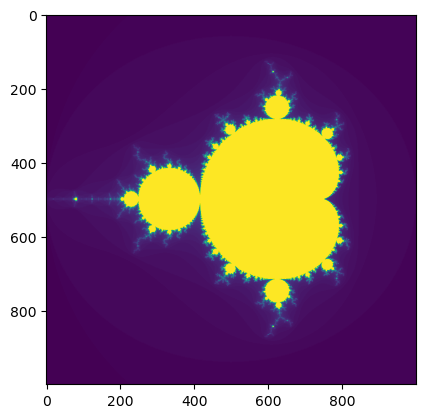

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, v kolikáté iteraci $k$ se stalo, že $|z_i| > 2$ (jakmile toto nastane jednou, už to bude platit pro všechna $n > i$)
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [97]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    real, imag = np.meshgrid(np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n))
    C = real + imag*1j
    Z = np.zeros_like(C)
    divergence_matrix = np.zeros((n, n))

    for i in range(k):
        Z = np.reshape([(2, i)[int(abs(i) < 2)] for i in (Z**2 + C).flat], (n, n))
        divergence_matrix += np.reshape([abs(i) < 2 for i in Z.flat], (n, n))

    return divergence_matrix

mandelbrot_set(n=11)

array([[  0.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  0.,   0.,   1.,   2.,   2.,   2.,   2.,   2.,   1.,   1.,   1.],
       [  0.,   1.,   2.,   2.,   3.,   3.,   8.,   4.,   2.,   1.,   1.],
       [  0.,   2.,   2.,   3.,   4., 100., 100., 100.,  14.,   2.,   1.],
       [  0.,   3.,   4.,  11.,   8., 100., 100., 100.,  14.,   2.,   1.],
       [  0., 100., 100., 100., 100., 100., 100., 100.,   6.,   2.,   1.],
       [  0.,   3.,   4.,  11.,   8., 100., 100., 100.,  14.,   2.,   1.],
       [  0.,   2.,   2.,   3.,   4., 100., 100., 100.,  14.,   2.,   1.],
       [  0.,   1.,   2.,   2.,   3.,   3.,   8.,   4.,   2.,   1.,   1.],
       [  0.,   0.,   1.,   2.,   2.,   2.,   2.,   2.,   1.,   1.,   1.],
       [  0.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.]])

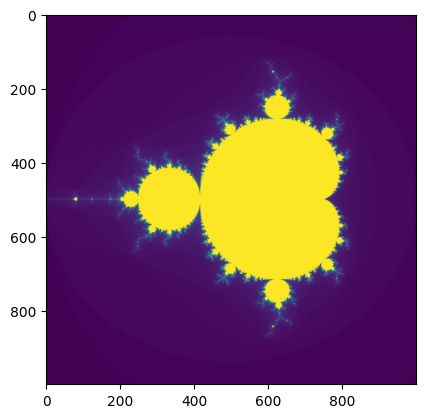

In [113]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral).

In [2]:
def julia_set(x_min = -1, x_max = 1, y_min = -1, y_max = 1, n = 1000, k = 100, func = (lambda z: z*z), R = 1, overflow = 1000):
    real, imag = np.meshgrid(np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n))
    Z = real + imag*1j
    divergence_matrix = np.zeros((n, n))

    for i in range(k):
        Z = np.reshape([func(z) for z in Z.flat], (n, n))
        Z = np.reshape([(overflow, i)[int(abs(i) < overflow)] for i in Z.flat], (n, n))
        divergence_matrix += np.reshape([abs(i) < R for i in Z.flat], (n, n))
    
    return divergence_matrix

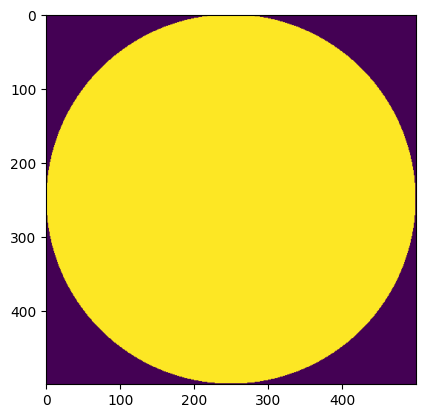

In [140]:
divergence_matrix = julia_set(n=500)
plt.imshow(divergence_matrix)

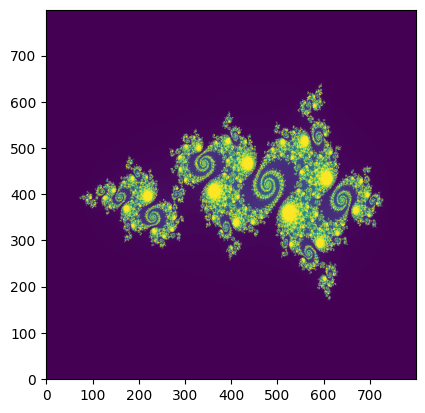

In [165]:
divergence_matrix = julia_set(x_min=-1.5, n=800, k=250, func=(lambda z: 2*z**3 + z**2 - z + 0.1j))
plt.imshow(divergence_matrix, origin="lower")

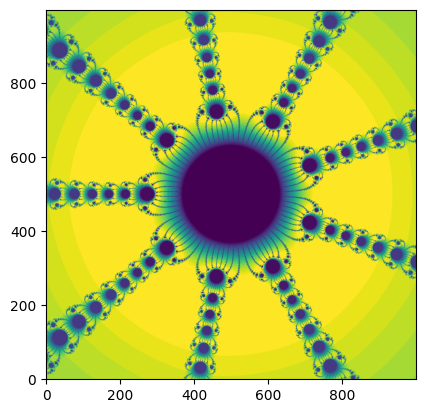

In [ ]:
def my_func(z):
    n = 9
    x = 1 + (n-1) * z**n
    y = n * z**(n-1)
    return x/y

a = 1.8
divergence_matrix = julia_set(x_min=-a, x_max=a, y_min=-a, y_max=a, func=my_func, R=1.4, k=30)
plt.imshow(divergence_matrix, origin="lower")

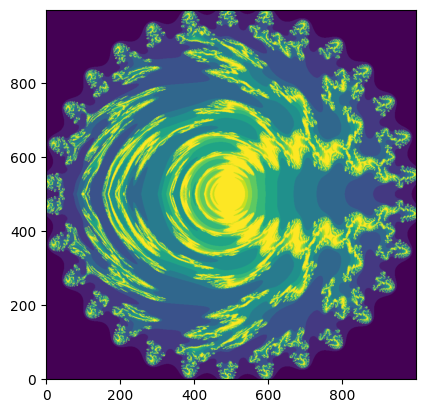

In [134]:
divergence_matrix = julia_set(func=(lambda z: z**(np.e**(-np.abs(z))) + z**30), k=12, R=1.5)
plt.imshow(divergence_matrix, origin="lower")

In [169]:
def prime_integer_spiral(n):
    ints = integer_spiral_numpy(n)

    for i, a in enumerate(ints):
        for j, b in enumerate(a):
            sqrt = np.sqrt(b)

            if b == 1:
                ints[i, j] = 0
                continue
            if b == 2:
                ints[i, j] = 1
                continue

            for k in [2] + list(range(3, int(sqrt+1), 2)):
                if b % k == 0:
                    ints[i, j] = 0
                    break
            else:
                ints[i, j] = 1
    
    return ints

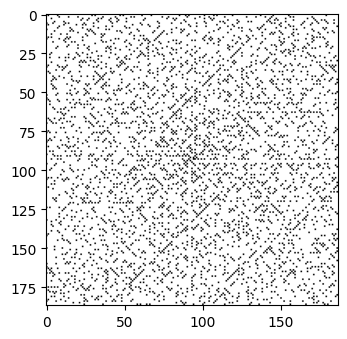

In [173]:
primes = prime_integer_spiral(187)
plt.imshow(primes, cmap="Grays")